In [24]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
%matplotlib inline

In [30]:
df = pd.read_csv("./dataset.csv")
df.sample(10)

,letter,hand,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11,x12,y12,z12,x13,y13,z13,x14,y14,z14,x15,y15,z15,x16,y16,z16,x17,y17,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
37513,M,0,-0.023501,0.084051,0.000452,0.008611,0.066940,-0.006743,0.017997,0.034817,-0.020937,0.000988,0.005943,-0.033811,-0.024434,-0.014602,-0.044595,0.022369,0.002524,0.004903,0.034983,-0.002328,-0.014328,0.037073,0.013268,-0.017542,0.026312,0.036069,-0.018683,0.001590,-0.002284,0.006774,0.019267,-0.025148,-0.013654,0.016855,-0.007521,-0.032369,0.011895,0.012217,-0.034790,-0.016049,-0.005774,-0.002518,-0.005691,-0.024786,-0.020910,-0.000845,-0.011161,-0.035211,-0.000960,0.006076,-0.038278,-0.037273,0.005371,-0.012567,-0.017433,0.006273,-0.028690,-0.009555,0.023750,-0.038317,-0.017248,0.039380,-0.033358
52328,Q,1,0.082879,0.022997,0.002231,0.056754,0.038184,0.020423,0.033012,0.049437,0.030602,0.010948,0.066722,0.057623,-0.014914,0.079806,0.083130,-0.004220,0.012589,0.029167,-0.019188,0.031249,0.017348,-0.028686,0.048186,0.011198,-0.035733,0.074904,-0.010893,-0.005273,-0.001610,0.008746,-0.015718,0.026729,-0.004099,0.001916,0.045278,-0.000791,0.016312,0.033201,0.008308,0.001006,-0.009007,-0.018855,-0.006382,0.023044,-0.022906,0.011202,0.037482,-0.017316,0.023337,0.023846,-0.005620,0.014789,-0.002195,-0.038521,0.006322,0.015845,-0.041344,0.013991,0.029058,-0.034017,0.024473,0.019931,-0.027658
48290,V,1,-0.025401,0.087057,0.043227,-0.039944,0.059212,0.012002,-0.033851,0.040740,-0.005271,-0.016658,0.025971,-0.032955,0.007245,0.016517,-0.035087,-0.024161,-0.010827,-0.003179,-0.025999,-0.041474,-0.011315,-0.027538,-0.064167,-0.017446,-0.032199,-0.082638,-0.038671,-0.002030,-0.007301,0.001858,0.021515,-0.041540,-0.004960,0.029297,-0.058518,-0.018248,0.041842,-0.079949,-0.028609,0.017172,0.005902,0.002546,0.016939,0.007560,-0.026446,0.003290,0.025471,-0.035520,-0.006925,0.037781,-0.028703,0.023937,0.029470,0.004425,0.021458,0.030264,-0.014179,0.007733,0.038227,-0.019230,0.000360,0.046305,-0.014197
72729,P,0,0.039016,0.068215,0.031674,0.029849,0.046506,-0.002141,0.018626,0.019539,-0.018866,-0.002357,0.001121,-0.033196,-0.015502,-0.005332,-0.037063,0.007158,-0.005134,-0.018785,-0.012740,-0.014657,-0.024516,-0.039188,-0.026556,-0.028894,-0.066822,-0.032632,-0.040781,-0.000357,-0.001583,0.001533,-0.018645,0.000571,-0.010863,-0.027415,0.019780,-0.014961,-0.036254,0.028605,-0.010177,-0.005766,0.002761,0.010935,-0.014826,0.016832,0.002273,-0.005738,0.033022,0.006544,0.007683,0.043762,0.016668,-0.009451,0.021814,0.026435,-0.020428,0.021451,0.017049,-0.018423,0.030146,0.006500,-0.010759,0.034051,0.007241
74760,P,0,-0.082696,-0.010842,0.028901,-0.051675,-0.032319,0.029814,-0.020217,-0.033416,0.037079,0.006601,-0.020382,0.036971,0.020270,-0.005384,0.034089,0.002843,-0.026585,0.000661,0.033074,-0.028389,0.001634,0.055784,-0.030751,0.007504,0.074045,-0.034439,0.014113,0.002774,-0.003702,-0.001972,0.033937,0.008710,0.004071,0.050291,0.012384,0.011048,0.067736,0.018700,0.020589,-0.001399,0.017199,-0.001331,0.009142,0.018934,0.019671,0.001939,0.010826,0.041388,-0.010596,0.004687,0.055142,-0.017727,0.029321,0.008037,-0.007559,0.030164,0.025354,-0.012894,0.023231,0.045340,-0.022037,0.019159,0.047061
67532,L,0,-0.000726,0.085891,0.033040,0.022108,0.061136,0.006616,0.038263,0.037193,-0.011460,0.057692,0.015480,-0.026854,0.076757,0.004540,-0.027854,0.024821,-0.008474,-0.006322,0.027045,-0.037319,-0.007017,0.028020,-0.060746,-0.015030,0.024718,-0.080739,-0.038452,0.002425,-0.005068,0.004190,-0.005018,-0.020276,-0.032437,-0.003896,0.004734,-0.044033,0.002865,0.019505,-0.023513,-0.018215,0.002278,0.004231,-0.022999,0.001537,-0.031558,-0.013716,0.022784,-0.033478,-0.004757,0.033327,-0.014631,-0.037276,0.023703,0.006014,-0.037634,0.014748,-0.016035,-0.030970,0.025587,-0.029386,-0.020229,0.034590,-0.021422
32548,H,1,-0.073777,0.061431,0.036404,-0.075525,0.027012,0.005155,-0.060766,0.010378,-0.020399,-0.035820,0.001847,-0.048205,

<Axes: xlabel='letter'>

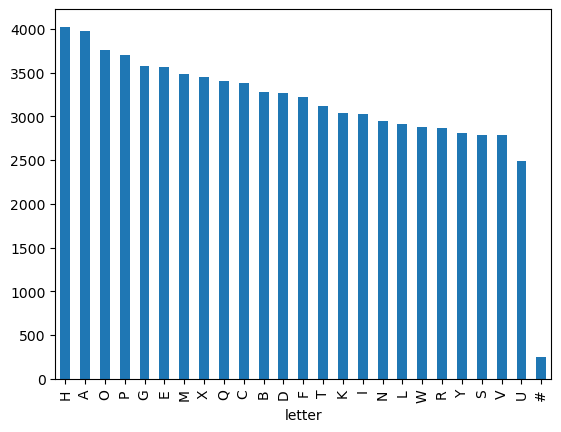

In [11]:
df["letter"].value_counts().plot(kind="bar")

In [12]:
data = df.iloc[:, 1:].values
letters = df.iloc[:, 0].values

## Training

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(letters, data, test_size=0.3, random_state=42)

In [14]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().fit(Y_train)
joblib.dump(scaler, "models/scaler.pkl")

['models/scaler.pkl']

In [15]:
from sklearn.neighbors import KNeighborsClassifier

Y_train = scaler.transform(Y_train)
Y_test = scaler.transform(Y_test)
classifier = KNeighborsClassifier(n_neighbors=3)

classifier.fit(Y_train, X_train)
joblib.dump(classifier, "models/predictor.pkl")

['models/predictor.pkl']

In [16]:
letters_pred = classifier.predict(Y_test)

## Evaluation

### Correlation

In [32]:
corrdf = df.copy()
corrdf.drop("hand", axis=1, inplace=True)
corrdf["letter"] = corrdf["letter"].apply(lambda x: ord(x) - ord("A"))
correlations = corrdf.corr()["letter"][1:].abs().sort_values(ascending=False)
correlations[correlations < 0.05].to_frame().T

,x15,x10,x9,x20,x6,y0,z4,y10,x1,y11,z11,y1,x2,x19,x5,x14,z0,x13,x17,y12,z18,z15,x18,z19
letter,0.046967,0.043972,0.042511,0.036773,0.034237,0.032946,0.032408,0.032303,0.031729,0.030175,0.028916,0.026402,0.024799,0.021135,0.020941,0.020199,0.019999,0.018913,0.017783,0.009892,0.007766,0.007005,0.002857,0.002388


### Accuracy

In [ ]:
from sklearn.metrics import classification_report

classification_report(X_test, letters_pred, output_dict=True)
pd.DataFrame(classification_report(X_test, letters_pred, output_dict=True)).T


,precision,recall,f1-score,support
#,1.000000,0.986111,0.993007,72.000000
A,0.999144,0.998289,0.998716,1169.000000
B,0.998979,0.998979,0.998979,979.000000
C,0.998071,1.000000,0.999035,1035.000000
D,0.998972,0.997947,0.998459,974.000000
E,1.000000,0.998138,0.999068,1074.000000
F,1.000000,0.992608,0.996290,947.000000
G,1.000000,1.000000,1.000000,1065.000000
H,1.000000,1.000000,1.000000,1263.000000
I,1.000000,1.000000,1.000000,913.000000


### Confusion Matrix

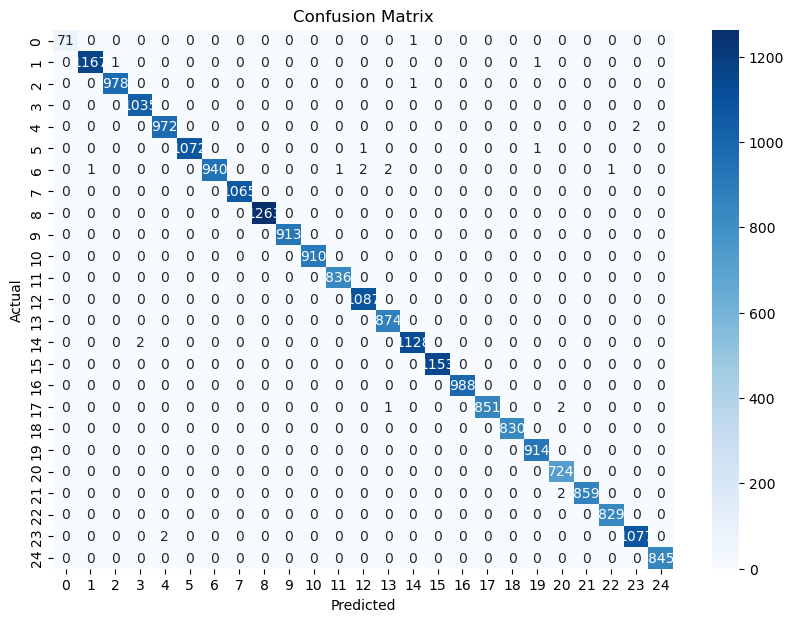

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(X_test, letters_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Finding optimal k

In [ ]:
accu = []

for i in range(1, 15):
	knn = KNeighborsClassifier(n_neighbors=i)
	knn.fit(Y_train, X_train)
	pred_i = knn.predict(Y_test)
	accu.append(knn.score(Y_test, X_test))
	print(i, end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 

Text(0.5, 1.0, 'Accuracy rate K value')

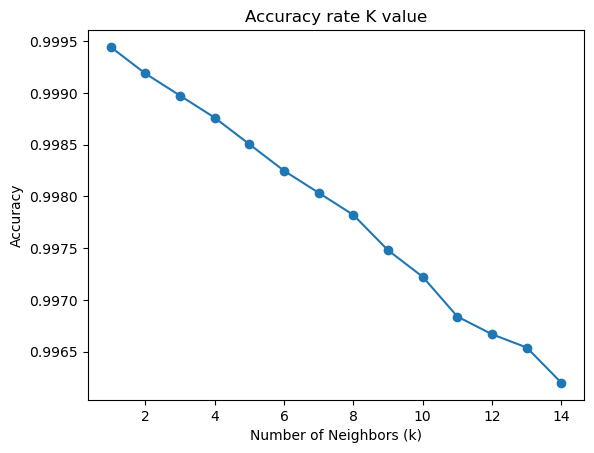

In [ ]:
plt.plot(range(1, 15), accu, marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy rate K value")

### Speed

In [ ]:
import random
import time

start = time.time()
knn.predict([Y_test[random.randint(0, len(Y_test))]])
end = time.time()

print(f"Prediction Time: {end - start:.6f} seconds")

Prediction Time: 0.008121 seconds
